In [1]:
import tensorflow as tf
from tensorflow.keras import layers,optimizers,datasets,Sequential
import os
from resnet import resnet18,resnet34
import numpy as np
import datetime
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [46]:
(x,y),(x_test,y_test) = datasets.cifar100.load_data()
x = x.astype(np.float32)
x_test = x_test.astype(np.float32)
y=tf.squeeze(y,axis=1)
y_test=tf.squeeze(y_test,axis=1)


In [83]:
img1 = x[4]/255
img2 = x[5]/255

In [9]:
import matplotlib.pyplot as plt

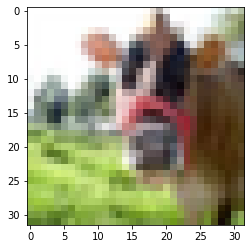

In [12]:
plt.imshow(img1)

In [96]:
def cutout_mask(img,):
    length = 12
    img = img.copy()
    h,w ,channel= img.shape
   
    y = np.random.randint(h)
    x = np.random.randint(w)

    y1 = np.clip(y - length // 2, 0, h)
    y2 = np.clip(y + length // 2, 0, h)
    x1 = np.clip(x - length // 2, 0, w)
    x2 = np.clip(x + length // 2, 0, w)
    img[ y1: y2, x1: x2, :] = 0 
    
    return img

In [97]:
img_cutout = cutout_mask(img1)

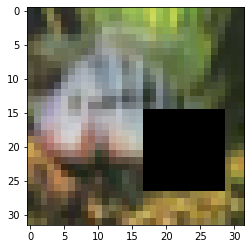

In [98]:
plt.imshow(img_cutout)

In [64]:
def mixup_mask(img1,img2):
    img1 = img1.copy()
    img2 = img2.copy()

    h,w,channel_num = img1.shape
    
    lamda = np.random.uniform()
    img1 = lamda*img1+ (1-lamda) * img2

    return img1

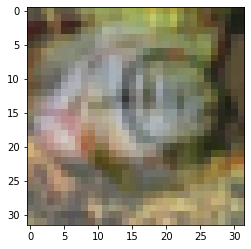

In [100]:
img_mixup = mixup_mask(img1,img2)
plt.imshow(img_mixup)

In [67]:
def cutmix_mask(img1,img2):
    img1 = img1.copy()
    img2 = img2.copy()
    length = 12
    h,w,channel_num = img1.shape
    y = np.random.randint(h)
    x = np.random.randint(w)

    y1 = np.clip(y - length // 2, 0, h)
    y2 = np.clip(y + length // 2, 0, h)
    x1 = np.clip(x - length // 2, 0, w)
    x2 = np.clip(x + length // 2, 0, w)
    
    img1[y1: y2, x1: x2, :] = img2[ y1: y2, x1: x2, :]
    return img1

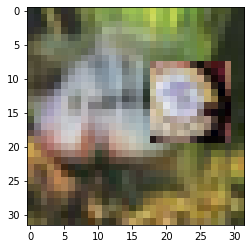

In [102]:
img_cutmix = cutmix_mask(img1,img2)
plt.imshow(img_cutmix)